In [1]:
from PIL import Image
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
file_path = 'examples/invoice-1.png'

In [3]:
data = pytesseract.image_to_data(file_path, output_type="dict")


In [4]:
rows = []
skip_conditions = [
    lambda x: x in ['|', '_', '-'],
    lambda x: len(x.strip()) == 0
]
for i in range(len(data['text'])):
    position_x0 = data['left'][i]
    position_x1 = data['left'][i] + data['width'][i]
    position_y0 = data['top'][i]
    position_y1 = data['top'][i] + data['height'][i]
    content = data['text'][i]
    if any(skip_condition(content) for skip_condition in skip_conditions):
        continue
    else:
        rows.append({'position_x0': position_x0, 'position_x1': position_x1, 'position_y0': position_y0, 'position_y1': position_y1, 'content': content})

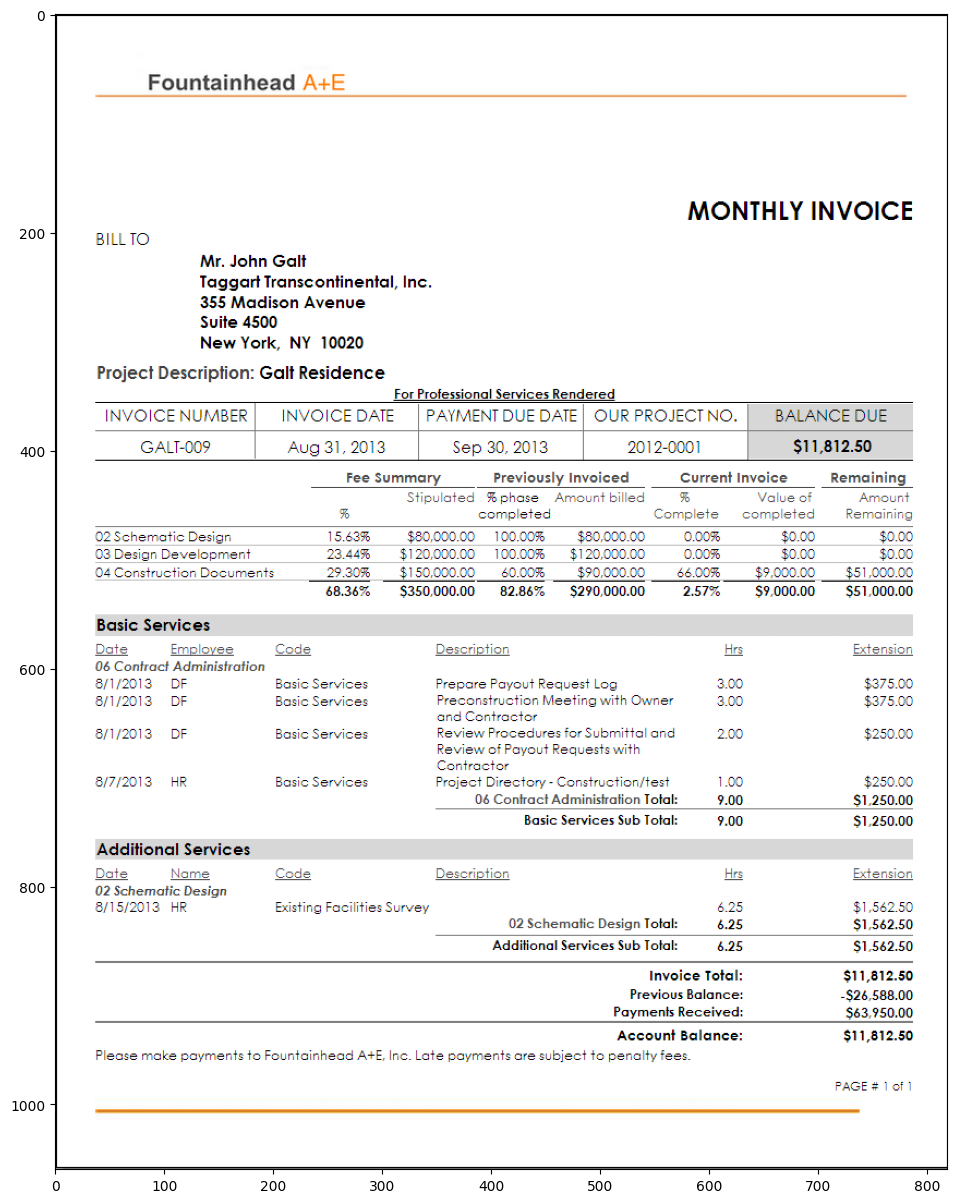

In [5]:
img = plt.imread(file_path)
fig, ax = plt.subplots(1, figsize=(15,15))

# Display the image
ax.imshow(img)
# Show the image
plt.show()

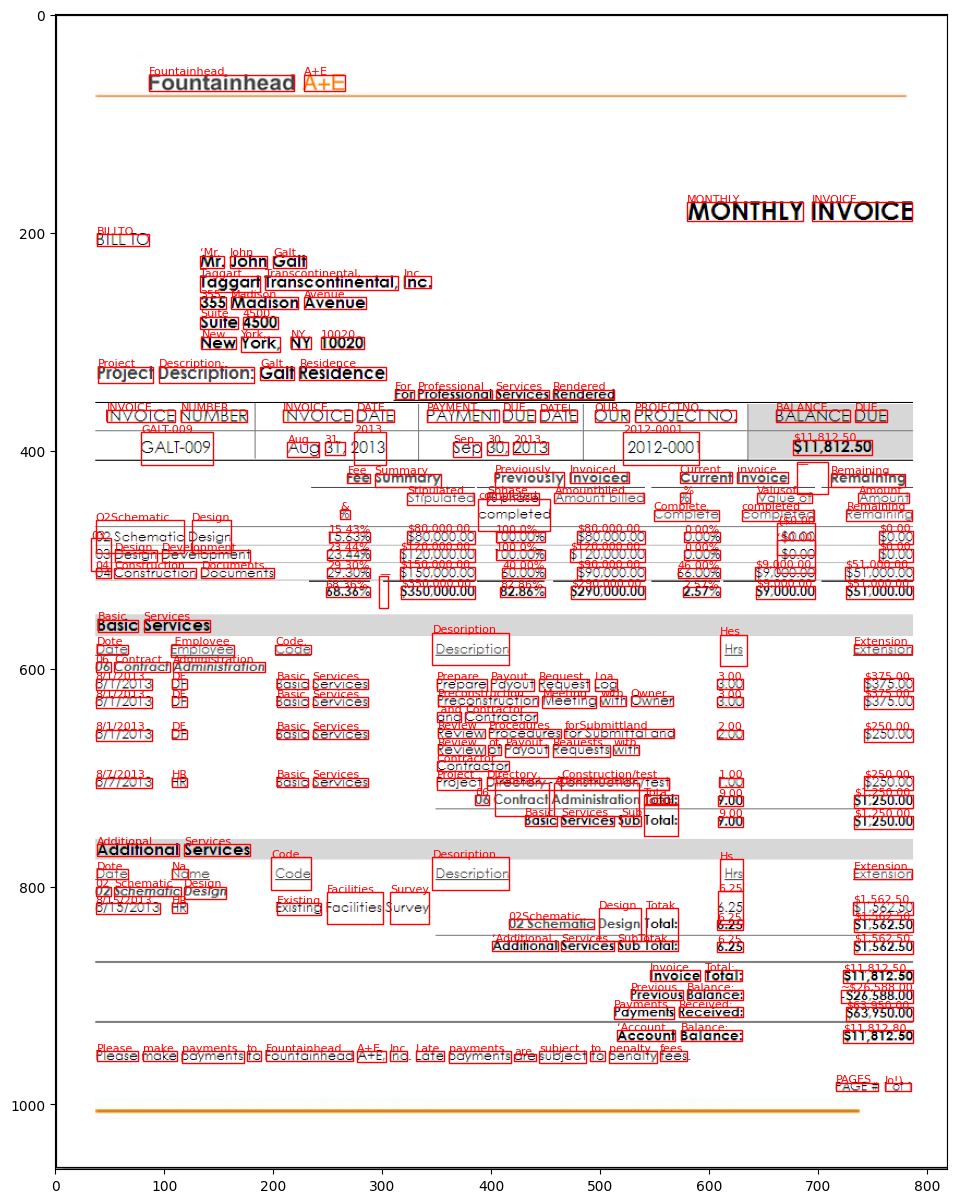

In [6]:
img = plt.imread(file_path)
fig, ax = plt.subplots(1, figsize=(15, 15))

# Display the image
ax.imshow(img)

for box in rows:
    rect = patches.Rectangle((box['position_x0'], box['position_y0']), box['position_x1']-box['position_x0'], box['position_y1']-box['position_y0'], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.annotate(box['content'], (box['position_x0'], box['position_y0']), fontsize=8, color='r')

# Show the image
plt.show()